## <center> Akhilesh Bhaugeerutty & Magib Seck & Mouad Tai <b/>
### <center> Exercices Python

#### Exercices à rendre pour le 09/02:
Exercice 3 page 92 & Exercice 2 page 102.

## Exercice 1


Comme auparavant, on charge les données dans un dataframe crédit: 

In [1]:
import pandas as pd
import numpy as np 
credit = pd.read_pickle("Downloads/credit.pkl")
credit.head()

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s,A16
0,30.83,0.000,1.25,1.0,202.0,0.0,0,1,0,1,...,0,1,0,1,1,0,1,0,0,+
1,58.67,4.460,3.04,6.0,43.0,560.0,1,0,0,1,...,0,1,0,1,1,0,1,0,0,+
2,24.50,0.500,1.50,0.0,280.0,824.0,1,0,0,1,...,0,1,1,0,1,0,1,0,0,+
3,27.83,1.540,3.75,5.0,100.0,3.0,0,1,0,1,...,0,1,0,1,0,1,1,0,0,+
4,20.17,5.625,1.71,0.0,120.0,0.0,0,1,0,1,...,0,1,1,0,1,0,0,0,1,+


La variable cible étant A16, on crée les échantillons de test et d'apprentissage ainsi:

In [2]:
from sklearn.model_selection import train_test_split
variables = [x for x in credit.columns if x!='A16'] 
X = credit[variables] 
Y = credit['A16']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=2018)

Nous allons à présent entraîner les données dans un réseau de neurones.

##### Neural Network 1

On crée un premier réseau de neurones, à deux couches cachées: 

In [29]:
from sklearn.neural_network import MLPClassifier
nn1 = MLPClassifier(hidden_layer_sizes=(10,8),activation='logistic', solver='lbfgs',random_state=2018, max_iter = 500)
nn1.fit(X_train,Y_train)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 8), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=2018, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,nn1.predict(X_test))

0.676829268292683

In [31]:
from sklearn.metrics import roc_auc_score as auc
auc(Y_test,nn1.predict_proba(X_test)[:,1])

0.7136886102403345

Ces chiffres paraissent plutôt faibles. On obtient en effet une précision inférieure à celle obtenue lors de la régression logistique normale, alors que ce modèle plus complexe devrait être capable de fournir une précision supérieure. <br>
On scale les données pour voir si il y a un gain en précision:


In [28]:
from sklearn.preprocessing import StandardScaler 
s = StandardScaler() 
s.fit(X) 
X_train_sc = s.transform(X_train) 
X_test_sc = s.transform(X_test)

nn1.fit(X_train_sc,Y_train)
print("Accuracy =", accuracy_score(Y_test,nn1.predict(X_test_sc)))
print("AUC =", auc(Y_test,nn1.predict_proba(X_test_sc)[:,1]))


Accuracy = 0.8353658536585366
AUC = 0.8653530377668309


On obtient un net gain en précision et dans le score AUC, je vais ainsi utilser les données scalées à présent. 

##### Neural Network 2

Pour nn2, on ajoute une couche cachée ('hidden layer'), on en a donc 3:

In [22]:
nn2 = MLPClassifier(hidden_layer_sizes=(10,5,8),activation='logistic', solver='lbfgs',random_state=2018, max_iter = 500)
nn2.fit(X_train_sc,Y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 5, 8), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=2018, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [23]:
print("Accuracy =", accuracy_score(Y_test,nn2.predict(X_test_sc)))
print("AUC =", auc(Y_test,nn2.predict_proba(X_test_sc)[:,1]))

Accuracy = 0.8658536585365854
AUC = 0.8265412748171369


Un peu surprenant, nous avons gagné en accuracy, mais perdu sur le score AUC. Encore plus étrange, cette fois-ci, en prenant les données non normalisées, nous avons un meilleur AUC!

In [32]:
nn2.fit(X_train,Y_train)
print("Accuracy =", accuracy_score(Y_test,nn2.predict(X_test)))
print("AUC =", auc(Y_test,nn2.predict_proba(X_test)[:,1]))

Accuracy = 0.8292682926829268
AUC = 0.9340200029855203


Le paramètre *'solver'* indiqque le critère d'optimisation que le neural network va utilier. Ici, ayant mis 'lbfgs', on a utilisé un critère de Quasi-Newton. On aurait pu utiliser une descente du gradiant, mais l'algorithme de Quasi-Newton est plus performant et converge plus rapidement quand on utilise des petits datasets. Si nous avions plus de données, il aurait fallu considérer les autres paramètres. 

##### Graphique

Après avoir entrainé les deux neural networks, on va maintenant tracer leur courbe ROC respectives, et ainsi les comparer. Il faut d'abord transformer la colonne à prédire (Y) en variable binaire. 

In [40]:
credit['y'] = np.where(credit['A16']=='+', '1', '0')
credit.head()

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s,A16,y
0,30.83,0.000,1.25,1.0,202.0,0.0,0,1,0,1,...,1,0,1,1,0,1,0,0,+,1
1,58.67,4.460,3.04,6.0,43.0,560.0,1,0,0,1,...,1,0,1,1,0,1,0,0,+,1
2,24.50,0.500,1.50,0.0,280.0,824.0,1,0,0,1,...,1,1,0,1,0,1,0,0,+,1
3,27.83,1.540,3.75,5.0,100.0,3.0,0,1,0,1,...,1,0,1,0,1,1,0,0,+,1
4,20.17,5.625,1.71,0.0,120.0,0.0,0,1,0,1,...,1,1,0,1,0,0,0,1,+,1


In [45]:
creditbis = credit.drop(columns = ['A16'])
variables = [x for x in creditbis.columns if x!='y'] 
X = creditbis[variables] 
Y = creditbis['y']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=2018)
Y_test = '1' <= Y_test #on remplace par des booléens

In [62]:
nn1 = MLPClassifier(hidden_layer_sizes=(10,8),activation='logistic', solver='lbfgs',random_state=2018, max_iter = 500)
nn1.fit(X_train,Y_train)
nn2 = MLPClassifier(hidden_layer_sizes=(10,5,8),activation='logistic', solver='lbfgs',random_state=2018, max_iter = 500)
nn2.fit(X_train,Y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 5, 8), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=2018, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

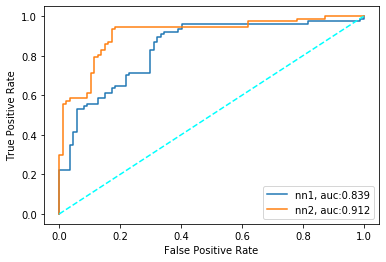

In [69]:
from sklearn.metrics import roc_curve, auc 
import matplotlib.pyplot as plt 


fpr, tpr, threshold = roc_curve(Y_test, nn1.predict_proba(X_test_sc)[:,1])
fpr2, tpr2, threshold2 = roc_curve(Y_test, nn2.predict_proba(X_test)[:,1])

auc(fpr,tpr)
auc(fpr2,tpr2)


plt.plot(fpr,tpr,label="nn1, auc:"+str(round(auc(fpr,tpr), 3))) 
plt.plot(fpr2,tpr2,label="nn2, auc:"+str(round(auc(fpr2,tpr2), 3))) 
plt.plot([0,1],[0,1],color='cyan',linestyle='--') 

plt.ylabel("True Positive Rate") 
plt.xlabel("False Positive Rate") 
plt.legend(loc=4) 
plt.show()

Bien que les deux courbes ROC ont l'air correctes, on voit que d'après la **'Règle du Nord-Ouest'**, le deuxième réseau de neurones est meilleur que le premier. 

**La Règle du Nord-Ouest:**
<br>
"Un point *(TFP(s), TVP(s))* de la courbe ROC correspondant à un classificateur donné est meilleur qu’un autre classificateur *(TFP(s'),TVP(s'))* s’il est au Nord-Ouest de celui-ci, *i.e*. qu’il aura un TVP plus élevé et un TFP plus faible.

## Exercice 2

On charge les données dans un dataframe 'insurance', puis comme toujours, les divise en échantillons test/apprentissage. 

In [70]:
insurance = pd.read_pickle("Downloads/insurance.pkl")
insurance.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [77]:
variables = [x for x in insurance.columns if x!='charges'] 
X = insurance[variables] 
Y = insurance['charges']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state=2003)

Pour s'assurer de l'homogéneité des résultats, on va scaler les données. 

In [74]:
s = StandardScaler() 
s.fit(X) 
X_train_sc = s.transform(X_train) 
X_test_sc = s.transform(X_test)

On va à présent lancer la phase d'apprentissage. 

##### Neural Network Regressor

In [191]:
from sklearn.neural_network import MLPRegressor 
nn1 = MLPRegressor(hidden_layer_sizes=(10,10), activation='relu', solver='lbfgs',random_state=2000, max_iter = 1000)
nn1.fit(X_train_sc,Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 10), learning_rate='constant',
             learning_rate_init=0.001, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=2000, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [192]:
from sklearn.metrics import r2_score, mean_absolute_error as mae
mae(Y_test,nn1.predict(X_test_sc))

2774.380043522321

L'erreur absolue est très élevée. Le modèle n'est pas adapté. Le $R^2$ quant à lui est plutôt correct. En effet, on obtient:

In [193]:
r2_score(Y_test,nn1.predict(X_test_sc))

0.8463565114631743

On cherche à présent à étudier les poids allant d'une couche cachée à une autre. <br>
nn1.coefs_[0] correspond aux poids de l'input vers la première couche cachée, coefs_[1] sera de la première couche vers la deuxième couche. 

In [194]:
len(nn1.coefs_[0])

11

* du neurone 3 de la couche caché 1 à l’ensemble des neurones de la couche caché 2:

In [195]:
nn1.coefs_[1][2]

array([ 0.9520181 , 18.88299653, -3.17921347, -0.74164668, -0.51166957,
       -0.77945734, -1.08036305, -0.0534209 , -2.2110309 , -0.45496379])

* du neurone 3 de la couche cachée 1 au neurone 5 de la couche cachée 2:

In [196]:
nn1.coefs_[1][2][4]

-0.5116695685895233

On regarde à présent les différents biais. On devrait avoir 10 biais pour la première et deuxième couche cachée. <br>
Ici, on s'occupe du biais de la deuxième couche cachée:

In [197]:
nn1.intercepts_[1]

array([  3.27783346, -24.95992679,  -4.10151137,  -5.50431172,
        -2.01921756,  -4.85272264,  -4.96543669,  -1.52925254,
       -13.85399939,  -3.16422055])

Puis, du biais du neurone 3 de la couche caché 1:


In [198]:
nn1.intercepts_[0][2]

-19.0866583063014

On pose maintenant: <br>
$N_i$ = number of input neurons <br>
$N_o$ = number of output neurons <br>
$N_s$ = number of samples in training data <br>
${\alpha}$ = an arbitrary scaling factor (usually 2-10).<br> 
$N_h = \frac{N_s}{(\alpha (N_i + N_o))}$ upper bound on the number of hidden neurons that won’t result in over-ﬁtting. 

Si l'on prend $\alpha = 5$, on a donc, avec $N_i =$ nombre de variables, $N_o = 1$, (car régression), et $N_s = n_{train}$:

In [143]:
ns = len(X_train)
a = 5
ni = X.shape[1]
no = 1
nh = ns/(a*(ni+no))
print('Nh =', nh)

Nh = 17.833333333333332


Il ne faut pas donc dépasser 18 neurones pour ne pas overfit les données.

Nous allons à présent faire une Cross Validation afin d'obtenir les meilleurs paramètres possibles dans notre réseau de neurones. Notre critère d'optimisation est de maximiser le $R^2$. <br>
Cette étape sera très lourde en calcul, nous allons faire au moins 81 calculs (chaque couple possible). 

In [206]:
# Création des couples: 
ss = np.arange(10,20)
L = []
for i in range(len(ss)):
    for j in range(len(ss)):
        L.append(tuple([ss[i],ss[j]]))


from sklearn.model_selection import GridSearchCV 
parameters = {'hidden_layer_sizes':L,
              'activation':['relu'],
              'solver':['lbfgs'],
              'random_state':[2000],'max_iter':[1000]} #on prend pas 800
nn = MLPRegressor() 
reg = GridSearchCV(nn, parameters, scoring='r2', cv = 5) 

In [207]:
reg.fit(X_train_sc,Y_train)
#reg.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_iter=200,
                                    momentum=0.9, n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_stat...
                                                (10, 13), (10, 14), (10, 15),
                                                (10, 16), (10, 17), (10, 18),
                                                (10, 19), (11, 10), (11, 11),
                                                (11, 12), (11, 13), (11, 14),
                

In [208]:
reg.best_score_

0.8239978074847466

In [209]:
reg.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (11, 14),
 'max_iter': 1000,
 'random_state': 2000,
 'solver': 'lbfgs'}

Il est important de prendre les données avec scaling, car sans normalisation, on obtient 18 neurones dans la deuxième couche cachée. On aurait donc un sur-apprentissage (selon la partie théorique), car $N_h < 18$. 

In [210]:
nnbest = MLPRegressor(hidden_layer_sizes=(11,14), activation='relu', solver='lbfgs',random_state=2000, max_iter = 800)
nnbest.fit(X_train_sc,Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(11, 14), learning_rate='constant',
             learning_rate_init=0.001, max_iter=800, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=2000, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [211]:
mae(Y_test,nnbest.predict(X_test_sc))

2895.204588332535

In [212]:
r2_score(Y_test,nnbest.predict(X_test_sc))

0.8390377571042289

Si l'on prend des données non scalées, on obtient des résultats différents évidemment. La Validation Croisée n'a pas été très efficace, le $R^2$ n'est pas vraiment un excellent critère de maximisation. <br>
De manière générale, le Réseau de Neurones a été moins efficace que le Support Vector Machine pour la Regression. Il faut donc se poser les bonnes questions, comme, a-t-on assez de données pour que les couches soient efficaces? 